In [5]:
import sys
sys.path.append('../')
import gurobipy as gp
from gurobipy import Model, GRB, quicksum
import numpy as np
from tqdm import tqdm
from src.IP import *
from src.Cuts import *
import torch
import matplotlib.pyplot as plt

In [2]:
test_size = 1000  
test_files = [f"../data/knapsack_test/knapsack_ip_test_{i}.pt" for i in range(test_size)]

In [3]:
mu_grid = [0.01*i for i in range(101)]
mu_treesize = []
for mu in (mu_grid):
    mu_treesize_i = 0
    for j in tqdm(range(1000)):
        ip_data = torch.load(test_files[j])
        ip = vector_to_ip(ip_data['ip_tensor'],82,32)
        x_LP = ip.get_LP_sol
        A, c, b = ip.A[:18,:], ip.c, ip.b[:18]
        cuts = cut_generator(A,c,b)
        CG_a, CG_b = cuts.candidate_CG()
        GMI_a, GMI_b = cuts.candidate_GMI()
        cuts_a = np.vstack((CG_a, GMI_a))
        cuts_b = np.hstack((CG_b, GMI_b))
        score, best_row_index = -np.inf, None
        for i in range(len(cuts_a)):
            score1 = (cuts_a[i]@x_LP - cuts_b[i].item())/np.linalg.norm(cuts_a[i], ord=2)
            score2 = np.abs(cuts_a[i]@c)/np.linalg.norm(cuts_a[i], ord=2)/np.linalg.norm(c, ord=2)
            if mu*score1 + (1-mu)*score2 > score:
                score = mu*score1 + (1-mu)*score2
                best_row_index = i
        if best_row_index < len(CG_a):
            selected_cut = 'CG'
        else:
            selected_cut = 'GMI'
        ip = vector_to_ip(ip_data['ip_tensor'],82,32)
        ip.add_cut(cuts_a[best_row_index], cuts_b[best_row_index].item())
        ip.optimize()
        mu_treesize_i += ip.treesize
    mu_treesize.append(mu_treesize_i/1000)
    print(f'mu:{mu}     ',mu_treesize_i/1000, f'best row index: {best_row_index}, selected cut: {selected_cut}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Set parameter Username
Academic license - for non-commercial use only - expires 2025-04-25


100%|██████████| 1000/1000 [01:28<00:00, 11.33it/s]


mu:0.0      288.196 best row index: 3, selected cut: CG


100%|██████████| 1000/1000 [01:27<00:00, 11.40it/s]


mu:0.01      288.196 best row index: 3, selected cut: CG


100%|██████████| 1000/1000 [01:28<00:00, 11.33it/s]


mu:0.02      288.196 best row index: 3, selected cut: CG


100%|██████████| 1000/1000 [01:26<00:00, 11.50it/s]


mu:0.03      288.196 best row index: 3, selected cut: CG


100%|██████████| 1000/1000 [01:28<00:00, 11.26it/s]


mu:0.04      287.646 best row index: 3, selected cut: CG


100%|██████████| 1000/1000 [01:28<00:00, 11.36it/s]


mu:0.05      279.337 best row index: 3, selected cut: CG


100%|██████████| 1000/1000 [01:26<00:00, 11.56it/s]


mu:0.06      304.074 best row index: 3, selected cut: CG


100%|██████████| 1000/1000 [01:26<00:00, 11.50it/s]


mu:0.07      315.282 best row index: 3, selected cut: CG


100%|██████████| 1000/1000 [01:26<00:00, 11.51it/s]


mu:0.08      330.236 best row index: 3, selected cut: CG


100%|██████████| 1000/1000 [01:25<00:00, 11.64it/s]


mu:0.09      343.087 best row index: 3, selected cut: CG


100%|██████████| 1000/1000 [01:27<00:00, 11.45it/s]


mu:0.1      344.784 best row index: 3, selected cut: CG


100%|██████████| 1000/1000 [01:28<00:00, 11.29it/s]


mu:0.11      343.215 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:26<00:00, 11.58it/s]


mu:0.12      344.036 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:25<00:00, 11.64it/s]


mu:0.13      343.981 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:26<00:00, 11.61it/s]


mu:0.14      345.741 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:26<00:00, 11.51it/s]


mu:0.15      345.741 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:27<00:00, 11.41it/s]


mu:0.16      346.52 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:25<00:00, 11.67it/s]


mu:0.17      346.52 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:26<00:00, 11.54it/s]


mu:0.18      346.52 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:26<00:00, 11.50it/s]


mu:0.19      346.52 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:25<00:00, 11.65it/s]


mu:0.2      346.52 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:26<00:00, 11.62it/s]


mu:0.21      346.52 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:27<00:00, 11.47it/s]


mu:0.22      346.52 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:26<00:00, 11.50it/s]


mu:0.23      346.781 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:28<00:00, 11.26it/s]


mu:0.24      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:28<00:00, 11.24it/s]


mu:0.25      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:28<00:00, 11.36it/s]


mu:0.26      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:27<00:00, 11.38it/s]


mu:0.27      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:30<00:00, 11.06it/s]


mu:0.28      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:27<00:00, 11.36it/s]


mu:0.29      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:27<00:00, 11.40it/s]


mu:0.3      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:25<00:00, 11.69it/s]


mu:0.31      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:28<00:00, 11.36it/s]


mu:0.32      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:26<00:00, 11.51it/s]


mu:0.33      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:37<00:00, 10.26it/s]


mu:0.34      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:50<00:00,  9.07it/s]


mu:0.35000000000000003      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:50<00:00,  9.03it/s]


mu:0.36      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:49<00:00,  9.15it/s]


mu:0.37      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:47<00:00,  9.32it/s]


mu:0.38      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:47<00:00,  9.28it/s]


mu:0.39      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:52<00:00,  8.92it/s]


mu:0.4      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:44<00:00,  9.59it/s]


mu:0.41000000000000003      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:46<00:00,  9.35it/s]


mu:0.42      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:50<00:00,  9.03it/s]


mu:0.43      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:41<00:00,  9.86it/s]


mu:0.44      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:45<00:00,  9.43it/s]


mu:0.45      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:51<00:00,  8.99it/s]


mu:0.46      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:52<00:00,  8.87it/s]


mu:0.47000000000000003      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:51<00:00,  8.98it/s]


mu:0.48      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:51<00:00,  8.93it/s]


mu:0.49      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:53<00:00,  8.80it/s]


mu:0.5      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:51<00:00,  8.95it/s]


mu:0.51      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [02:01<00:00,  8.24it/s]


mu:0.52      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [02:03<00:00,  8.12it/s]


mu:0.53      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [02:03<00:00,  8.09it/s]


mu:0.54      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [02:03<00:00,  8.12it/s]


mu:0.55      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [02:03<00:00,  8.11it/s]


mu:0.56      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [02:04<00:00,  8.02it/s]


mu:0.5700000000000001      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [02:04<00:00,  8.04it/s]


mu:0.58      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:52<00:00,  8.87it/s]


mu:0.59      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:36<00:00, 10.34it/s]


mu:0.6      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:36<00:00, 10.35it/s]


mu:0.61      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:36<00:00, 10.34it/s]


mu:0.62      348.045 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:36<00:00, 10.35it/s]


mu:0.63      347.484 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:36<00:00, 10.38it/s]


mu:0.64      345.287 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:35<00:00, 10.42it/s]


mu:0.65      345.187 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:36<00:00, 10.34it/s]


mu:0.66      345.583 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [01:36<00:00, 10.40it/s]


mu:0.67      343.69 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [02:00<00:00,  8.32it/s]


mu:0.68      345.402 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [02:07<00:00,  7.83it/s]


mu:0.6900000000000001      356.34 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [02:07<00:00,  7.82it/s]


mu:0.7000000000000001      357.565 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [02:08<00:00,  7.76it/s]


mu:0.71      373.916 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [02:09<00:00,  7.73it/s]


mu:0.72      383.677 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [02:09<00:00,  7.70it/s]


mu:0.73      405.662 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [02:10<00:00,  7.67it/s]


mu:0.74      422.164 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [02:08<00:00,  7.79it/s]


mu:0.75      442.18 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [02:07<00:00,  7.85it/s]


mu:0.76      463.859 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [02:09<00:00,  7.72it/s]


mu:0.77      485.406 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [02:09<00:00,  7.74it/s]


mu:0.78      504.07 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [02:09<00:00,  7.72it/s]


mu:0.79      512.021 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [02:09<00:00,  7.75it/s]


mu:0.8      518.528 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [02:09<00:00,  7.70it/s]


mu:0.81      524.566 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [02:10<00:00,  7.68it/s]


mu:0.8200000000000001      536.242 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [02:09<00:00,  7.74it/s]


mu:0.8300000000000001      548.205 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [02:10<00:00,  7.64it/s]


mu:0.84      565.263 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [02:11<00:00,  7.63it/s]


mu:0.85      564.702 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [02:10<00:00,  7.65it/s]


mu:0.86      572.91 best row index: 5, selected cut: GMI


100%|██████████| 1000/1000 [02:11<00:00,  7.61it/s]


mu:0.87      581.978 best row index: 4, selected cut: GMI


100%|██████████| 1000/1000 [02:10<00:00,  7.68it/s]


mu:0.88      589.467 best row index: 4, selected cut: GMI


100%|██████████| 1000/1000 [02:11<00:00,  7.62it/s]


mu:0.89      594.176 best row index: 4, selected cut: GMI


100%|██████████| 1000/1000 [02:11<00:00,  7.62it/s]


mu:0.9      605.167 best row index: 4, selected cut: GMI


100%|██████████| 1000/1000 [02:11<00:00,  7.59it/s]


mu:0.91      611.964 best row index: 4, selected cut: GMI


100%|██████████| 1000/1000 [02:10<00:00,  7.67it/s]


mu:0.92      620.038 best row index: 4, selected cut: GMI


100%|██████████| 1000/1000 [02:10<00:00,  7.68it/s]


mu:0.93      632.237 best row index: 4, selected cut: GMI


100%|██████████| 1000/1000 [02:11<00:00,  7.62it/s]


mu:0.9400000000000001      635.638 best row index: 4, selected cut: GMI


100%|██████████| 1000/1000 [02:12<00:00,  7.54it/s]


mu:0.9500000000000001      638.583 best row index: 4, selected cut: GMI


100%|██████████| 1000/1000 [02:11<00:00,  7.60it/s]


mu:0.96      635.248 best row index: 4, selected cut: GMI


100%|██████████| 1000/1000 [02:09<00:00,  7.72it/s]


mu:0.97      632.985 best row index: 4, selected cut: GMI


100%|██████████| 1000/1000 [02:10<00:00,  7.65it/s]


mu:0.98      631.795 best row index: 4, selected cut: GMI


100%|██████████| 1000/1000 [02:08<00:00,  7.80it/s]


mu:0.99      630.115 best row index: 4, selected cut: GMI


100%|██████████| 1000/1000 [02:10<00:00,  7.68it/s]

mu:1.0      636.56 best row index: 4, selected cut: GMI


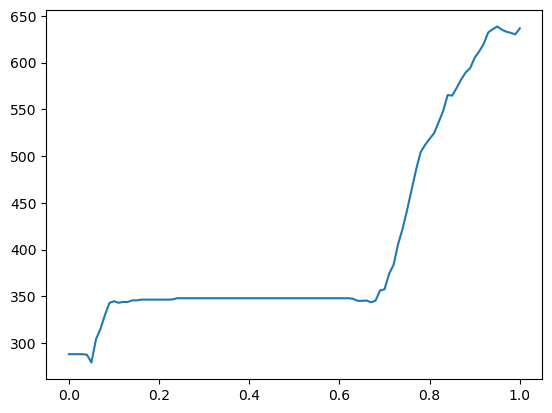

In [6]:
plt.plot(mu_grid, mu_treesize)

In [7]:
np.save('../data/mu_treesize_CG_and_GMI.npy', mu_treesize)